In [18]:
#データの準備
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 68-95-99.7ルール

In [2]:
stats.norm(loc=5, scale=3).rvs()

6.153106423736422

In [8]:
group1 = []
group2 = []
group3 = []
samples = []
loc = 4
scale = 3
for i in range(1000):
    sample = stats.norm(loc=loc, scale=scale).rvs()
    if loc-scale < sample < loc+scale:
        group1.append(sample)
    elif loc-2*scale < sample < loc+2*scale:
        group2.append(sample)
    elif loc-3*scale < sample < loc+3*scale:
        group3.append(sample)
    samples.append(sample)

In [11]:
len(group1)/len(samples)

0.678

In [12]:
len(group1+group2)/len(samples)

0.945

In [13]:
len(group1+group2+group3)/len(samples)

0.996

In [14]:
print(len(group1)/len(samples))
print(len(group1+group2)/len(samples))
print(len(group1+group2+group3)/len(samples))

0.678
0.945
0.996


## 標準化

In [19]:
scaler = StandardScaler()
scaler.fit_transform([[1], [2], [3], [4]])

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [20]:
scaler = StandardScaler()
scaler.fit_transform([[1, 30], [2, 50], [3, 10], [4, 10]])

array([[-1.34164079,  0.30151134],
       [-0.4472136 ,  1.50755672],
       [ 0.4472136 , -0.90453403],
       [ 1.34164079, -0.90453403]])

In [25]:
scaler = StandardScaler()
scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))

array([[-1.66301817e+00],
       [-4.28234299e-03],
       [ 9.49146717e-02],
       [-3.44925940e-01],
       [-2.29624968e-01],
       [ 4.17363756e-01],
       [ 1.10337948e+00],
       [-7.33936144e-01],
       [-5.00163567e-01],
       [ 9.47315739e-01],
       [ 9.35535257e-02],
       [-3.11727577e-01],
       [-9.67838090e-01],
       [ 3.24134057e-02],
       [ 7.02885077e-01],
       [ 3.42053237e-01],
       [ 1.41511894e-02],
       [ 1.09840651e+00],
       [ 7.45627991e-01],
       [ 2.33813456e-02],
       [ 1.09728238e+00],
       [-4.14587519e-01],
       [-3.18225155e-01],
       [ 5.16606793e-01],
       [-5.88357399e-03],
       [-4.82644844e-01],
       [-1.83995336e-01],
       [-5.24746516e-02],
       [ 6.12895542e-01],
       [-1.33408300e-01],
       [-1.47179215e-01],
       [-4.03019490e-01],
       [ 6.30066304e-01],
       [-6.95488521e-01],
       [ 3.79214012e-01],
       [-1.83383264e-01],
       [-6.26420825e-01],
       [ 3.36888626e-01],
       [-6.1

In [24]:
df['tip_rate'].values.reshape(-1, 1)

array([[0.05944673],
       [0.16054159],
       [0.16658734],
       [0.13978041],
       [0.14680765],
       [0.18623962],
       [0.22805017],
       [0.11607143],
       [0.13031915],
       [0.21853857],
       [0.16650438],
       [0.14180374],
       [0.10181582],
       [0.16277808],
       [0.20364127],
       [0.18164968],
       [0.16166505],
       [0.22774708],
       [0.20624632],
       [0.1622276 ],
       [0.22767857],
       [0.13553475],
       [0.14140774],
       [0.19228818],
       [0.160444  ],
       [0.13138686],
       [0.14958863],
       [0.15760441],
       [0.19815668],
       [0.15267176],
       [0.15183246],
       [0.13623978],
       [0.19920319],
       [0.11841469],
       [0.18391451],
       [0.14962594],
       [0.12262416],
       [0.18133491],
       [0.12359551],
       [0.15989767],
       [0.13965087],
       [0.14547537],
       [0.2195122 ],
       [0.13636364],
       [0.18421053],
       [0.16402406],
       [0.22492128],
       [0.185

In [30]:
scaler = StandardScaler()
scaler.fit_transform(df[['total_bill', 'tip_rate']])

array([[-3.14711305e-01, -1.66301817e+00],
       [-1.06323531e+00, -4.28234299e-03],
       [ 1.37779900e-01,  9.49146717e-02],
       [ 4.38315103e-01, -3.44925940e-01],
       [ 5.40744704e-01, -2.29624968e-01],
       [ 6.19536705e-01,  4.17363756e-01],
       [-1.23995452e+00,  1.10337948e+00],
       [ 7.98507107e-01, -7.33936144e-01],
       [-5.34203307e-01, -5.00163567e-01],
       [-5.63468908e-01,  9.47315739e-01],
       [-1.07111451e+00,  9.35535257e-02],
       [ 1.74175992e+00, -3.11727577e-01],
       [-4.91430507e-01, -9.67838090e-01],
       [-1.52624903e-01,  3.24134057e-02],
       [-5.57840908e-01,  7.02885077e-01],
       [ 2.01939101e-01,  3.42053237e-01],
       [-1.06436091e+00,  1.41511894e-02],
       [-3.93503306e-01,  1.09840651e+00],
       [-3.16962505e-01,  7.45627991e-01],
       [ 9.72582994e-02,  2.33813456e-02],
       [-2.10030504e-01,  1.09728238e+00],
       [ 5.67366990e-02, -4.14587519e-01],
       [-4.52034507e-01, -3.18225155e-01],
       [ 2.

## 二項分布

In [31]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)

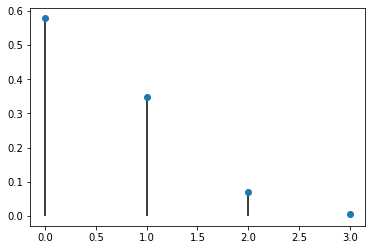

In [37]:
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

In [33]:
x

array([0, 1, 2, 3])

In [34]:
y

array([0.5787037 , 0.34722222, 0.06944444, 0.00462963])

## 二項分布ー＞正規分布

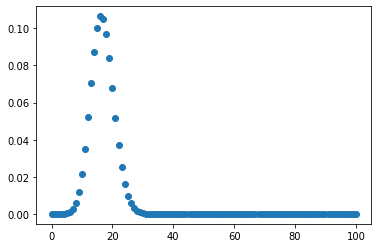

In [45]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)
plt.plot(x, y, 'o')

In [41]:
# 平均＝np
stats.binom(n, p).mean()

16.666666666666664

In [42]:
n*p

16.666666666666664

In [43]:
stats.binom(n, p).var()

13.888888888888888

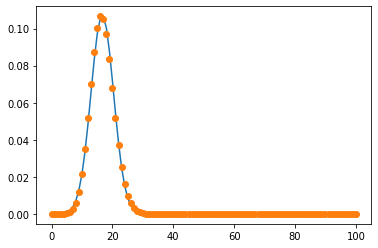

In [46]:
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')